## Лабороторная работа №1

### task 

1. Осуществить моделирование n = 100 300 1000 5000 реализаций БСВ с помощью мультипликативного конгруэнтного метода (МКМ) с параметрами a0, β, M = 2^31.
2. Проверить точность моделирования  датчика (п. 1 ) с помощью критерия согласия  chi-2-критерия Пирсона с уровнем значимости ε = 0.05.
3. Диаграмма рассеяния
4. Автокорреляционная функция
5. Доверительные интервалы для МО и дисперсии 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

from lab1.graph import draw_autocorr,draw_cdf,draw_freq,draw_intervals,draw_scatter
from lab1.tests import get_frequency


MAX_K = k = 10
N = 1000
M = 2.0 ** 31 -1
alpha0 = 111111111
beta = 16807.0
C = 29

a = 0
b = 1
uniform_mean = (a+b)/2
uniform_var = (b - a )**2/12

In [2]:
def mcg(alpha, beta, m, n,C):

    for i in range(n):
        alpha = (beta * alpha + C) % m
        yield alpha / m
        


## Выборка 150

In [3]:
N = 150
data = gen_numbers_n = list(mcg(alpha0, beta, M, N ,C))
sorted_seq = sorted(gen_numbers_n)



## Распределение  

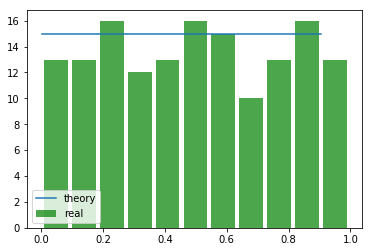

In [8]:
    
freq_real, segments = get_frequency(sorted_seq, k)
draw_freq(sorted_seq, [N/k] * (len(segments)),segments)
plt.show()

## Функция распределения

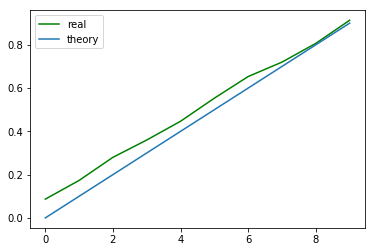

In [9]:
freq_real = [ x/N for x in freq_real]
cum_real = np.cumsum(freq_real)

def cum_ravn(x,a,b):
    return (x-a)/(b-a)

draw_cdf(cum_real,cum_ravn,np.arange(0, 1, 1/k))

## диаграмма рассеяния

y = (x_2i , x_2i+1)

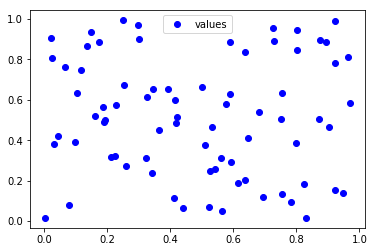

In [10]:
x_1 = [gen_numbers_n[i] for i in range(N) if i%2 == 1]
x_2 = [gen_numbers_n[i] for i in range(N) if i%2 == 0]
draw_scatter(x_1,x_2)


## автокорреляционная функция

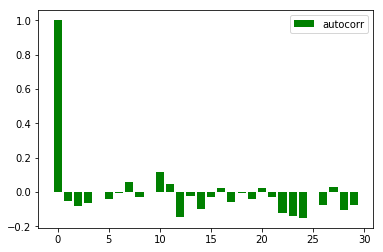

In [11]:
def autocorr(x, t=1):
    for i in range(0,t):
        y = x + [0]*i
        y = [ y[j+i] for j in range(len(x)) ]
        corr = np.corrcoef([x,y])
        yield corr[0][1]

corr = list(autocorr(gen_numbers_n,t=30))
draw_autocorr(corr)

## Выборки размера  300 500 1000 5000

распределение, автокорреляция, диагрмма рассеяния

распрделение для выборки размера 	 :cloud: 300


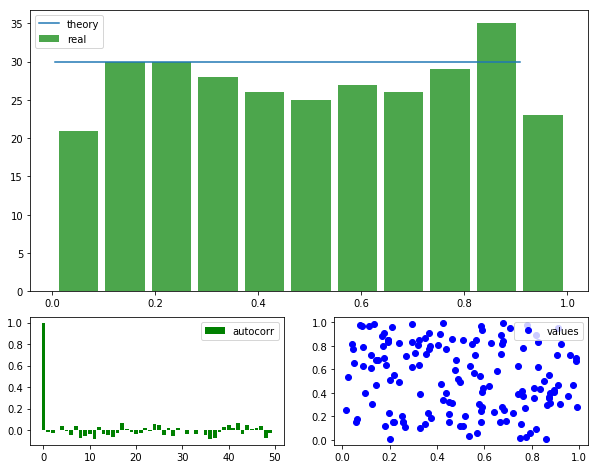

распрделение для выборки размера 	 :cloud: 500


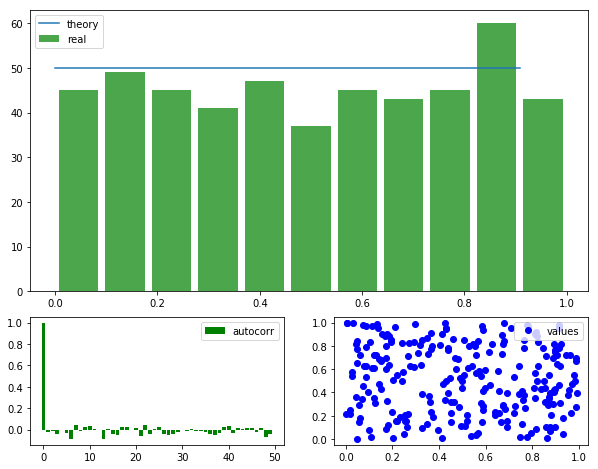

распрделение для выборки размера 	 :cloud: 1000


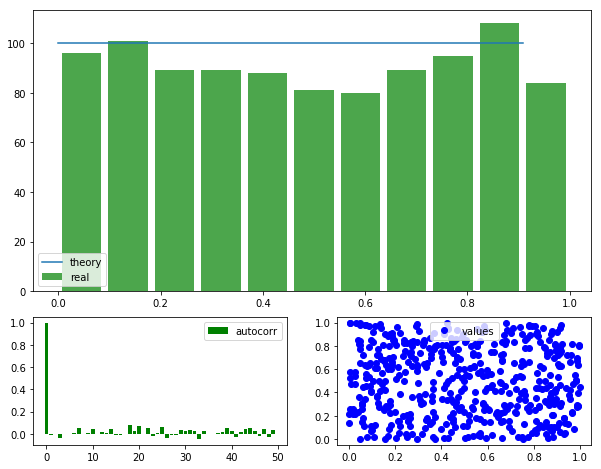

распрделение для выборки размера 	 :cloud: 5000


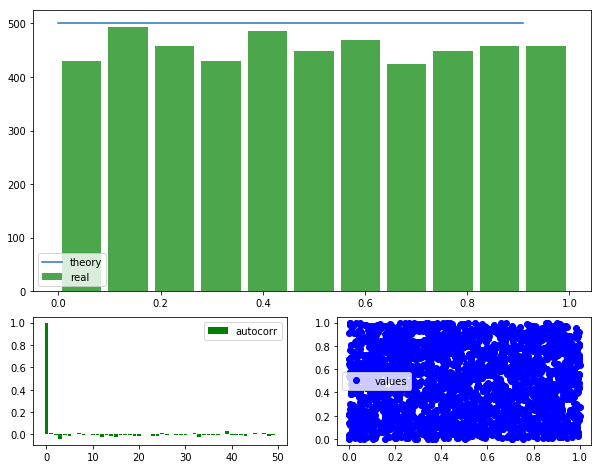

In [12]:
from lab1.utils import generate_results_lab1

generate_results_lab1(300,k)
generate_results_lab1(500,k)
generate_results_lab1(1000,k)
generate_results_lab1(5000,k)


## Доверительный интервал

the lower endpoint of the 95% confidence interval:

mean - 1.96* var / sqrt=(N)
mean + 1.96* var / sqrt=(N)


mean


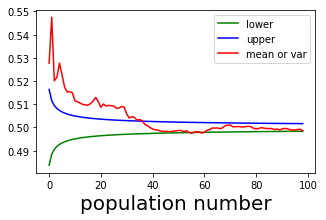

var


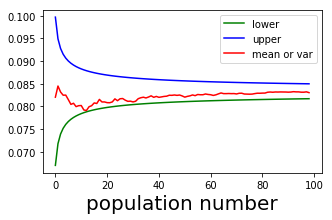

In [6]:
lower = []
upper = []
lower_var = []
upper_var = []
means_theory = []
vars_theory = []

for num in range(100,10000,100):
    data = list(mcg(alpha0, beta, M, num ,C))
    lower.append(uniform_mean - 1.96 * uniform_var / num ** 0.5)
    upper.append(uniform_mean + 1.96 * uniform_var / num ** 0.5)
    lower_var.append(uniform_var - 1.96 * uniform_var / num ** 0.5)
    upper_var.append(uniform_var + 1.96 * uniform_var / num ** 0.5)

    means_theory.append(np.mean(data))
    vars_theory.append(np.var(data))

print('mean')
draw_intervals(lower,upper,means_theory)
print('var')
draw_intervals(lower_var,upper_var,vars_theory)    

## Критерий пирсона 

In [20]:
from lab1.tests import pearson
from lab1.utils import format_test_result

MAX_K = k = 30
N = 10000
M = 2.0 ** 31 -1
alpha0 = beta = 16807.0
C = 1


data = gen_numbers_n = list(mcg(alpha0, beta, M, N ,C))
p = [1.0 / MAX_K] *MAX_K
gen_numbers_result = pearson(sorted(gen_numbers_n), p_list=p,k=MAX_K)

print('\npearson, chi:')
print('\tmcg:\t' + format_test_result(*gen_numbers_result))



pearson, chi:
	mcg:	k = 30 | 26.978 < 42.557 | test passed 


## Выводы

- При 2500 мо начниает приближаться к теоритическому.
- Дисперсия попадает в интервалы.
- Про автокорреляцию.
- Про критерий пирсона.
- Про диаграмму рассеяния. 